# VISA

In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'visa'
run= "contamination_0"  
experiment=  "Exp_18_06_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

['candle', 'capsules', 'cashew', 'chewinggum', 'fryum', 'macaroni1', 'macaroni2', 'pcb1', 'pcb2', 'pcb3', 'pcb4', 'pipe_fryum']


['candle', 'capsules', 'cashew', 'chewinggum', 'fryum', 'macaroni1', 'macaroni2', 'pcb1', 'pcb2', 'pcb3', 'pcb4', 'pipe_fryum']
['candle', 'capsules', 'cashew', 'chewinggum', 'fryum', 'macaroni1', 'macaroni2', 'pcb1', 'pcb2', 'pcb3', 'pcb4', 'pipe_fryum']
candle
capsules
cashew
chewinggum
fryum
macaroni1
macaroni2
pcb1
pcb2
pcb3
pcb4
pipe_fryum
       Loss  Loss_scale  image_AUC  pixel_AUC    category contamination  \
0  0.002058    0.004382   0.971200   0.967875      candle             0   
1  0.002037    0.004316   0.968400   0.974174      candle             0   
2  0.002053    0.004369   0.970000   0.971981      candle             0   
3  0.002050    0.004325   0.971700   0.972122      candle             0   
4  0.002043    0.004327   0.974100   0.971074      candle             0   
0  0.005143    0.009547   0.896833   0.982934    capsules             0   
1  0.005077    0.009450   0.871000   0.982507    capsules             0   
2  0.005101    0.009476   0.889667   0.983223    caps

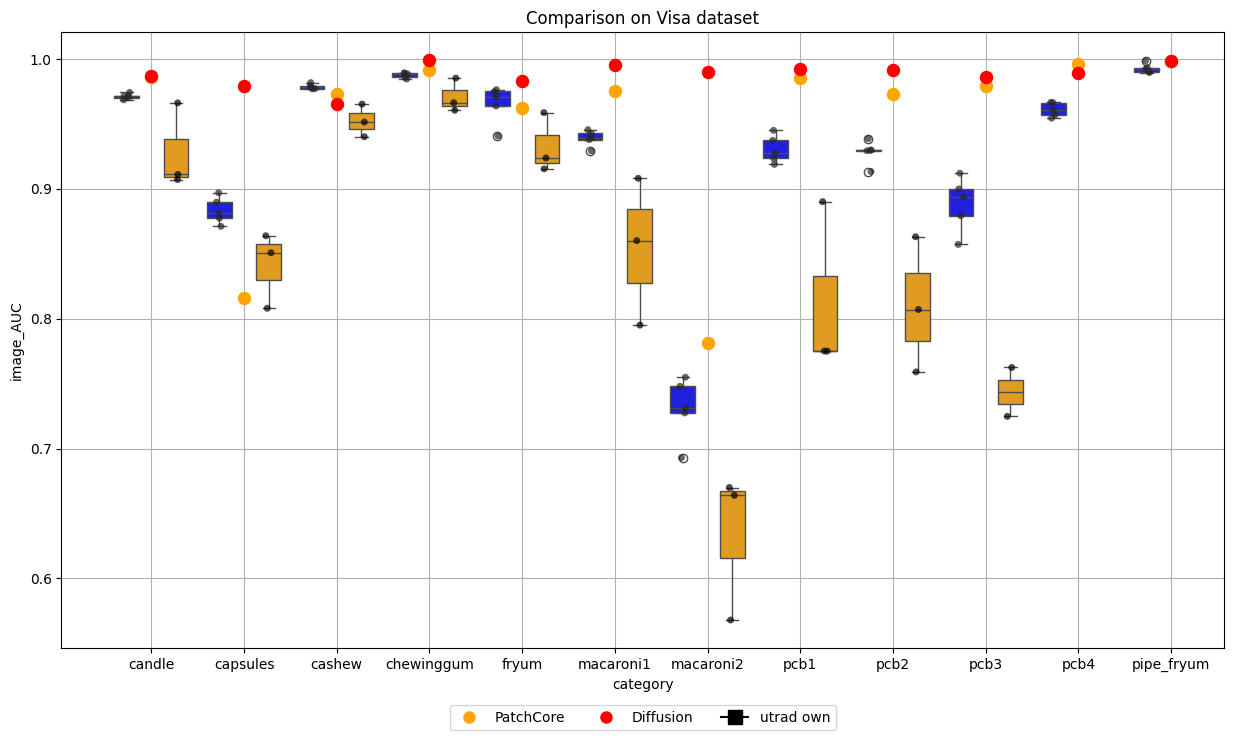

In [3]:
exp_name= "Exp_20_06_24"
category= "01"
root= '/home/bule/projects/UTRAD/results/visa/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

        if os.path.exists(logfile_path):
            if len(read_training_scores( logfile_path)['Loss'])<150:
                continue
            else:
                logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)

print(res_df)

exp_name= "Exp_01_07_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_10/'

run_range= np.arange(1,6)
res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)
res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['contaminated']*len(res_df_cont)

print(res_df_cont)


exp_name= "Exp_01_07_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_10/'

run_range= np.arange(1,6)
res_df_cont_c=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont_c.append(lastrow_df)
    
res_df_cont_c= pd.concat(res_df_cont_c)
res_df_cont_c['contamination']= ['10']*len(res_df_cont_c)
res_df_cont_c['setting']= ['clean_reduced']*len(res_df_cont_c)





res_df_end=pd.concat([res_df, res_df_cont,res_df_cont_c])



hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}

#https://paperswithcode.com/paper/diffusionad-denoising-diffusion-for-anomaly

# Data from the provided table
data = {
    "candle":     [0.986, 0.987],
    "capsules":   [0.816, 0.979],
    "cashew":     [0.973, 0.965],
    "chewinggum": [0.991, 0.999],
    "fryum":      [0.962, 0.983],
    "macaroni1":  [0.975, 0.995],
    "macaroni2":  [0.781, 0.990],
    "pcb1":       [0.985, 0.992],
    "pcb2":       [0.973, 0.991],
    "pcb3":       [0.979, 0.986],
    "pcb4":       [0.996, 0.989],
    "pipe_fryum": [0.998, 0.998],
}

# Creating dictionaries for PatchCore and Ours
auc_patchcore = {key: value[0] for key, value in data.items()}
auc_diffusion = {key: value[1] for key, value in data.items()}



# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_patchcore.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)

for category, auc in auc_diffusion.items():
    ax.scatter(x=[category], y=auc, color='red', s=75, zorder=5)
    
    
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='PatchCore', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Diffusion', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='black', label='utrad own', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Visa dataset')
plt.grid(True)
plt.show()

In [4]:
def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{str(category)}', log)
            if os.path.exists(logfile_path):
                if len(read_training_scores(logfile_path)['Loss'] )==150:
                    logfile_paths.append(logfile_path)  
                    logfile_path_names.extend([logfile_path]*150)
                    runs.extend([run]*150) 
        print(logfile_paths)
        if len(logfile_paths)==0:
            continue
        else:
            allrows_df=all_results_conc(logfile_paths)
            allrows_df['path']=logfile_path_names        
            allrows_df['run']=runs
            allrows_df['category']= [category]*len(allrows_df)
            allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
            allrows_df['contamination']= [contamination]*len(allrows_df)
            allrows_df['setting']= [setting]*len(allrows_df)
            res_df.append(allrows_df)
            
    return  pd.concat(res_df)

allrows_df_end_cont=         read_all_log_info(root= '/home/bule/projects/UTRAD/results/visa/',log='args.log',exp_name= "Exp_01_07_24",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/visa.json')
#allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/visa/',log='args_cleaned.log',exp_name= "Exp_01_07_24",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/visa.json')
allrows_df_end_clean=        read_all_log_info(root= '/home/bule/projects/UTRAD/results/visa/',log='args.log',exp_name= "Exp_20_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/visa.json')

allres=pd.concat([allrows_df_end_cont#,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

SyntaxError: invalid syntax (640438414.py, line 44)

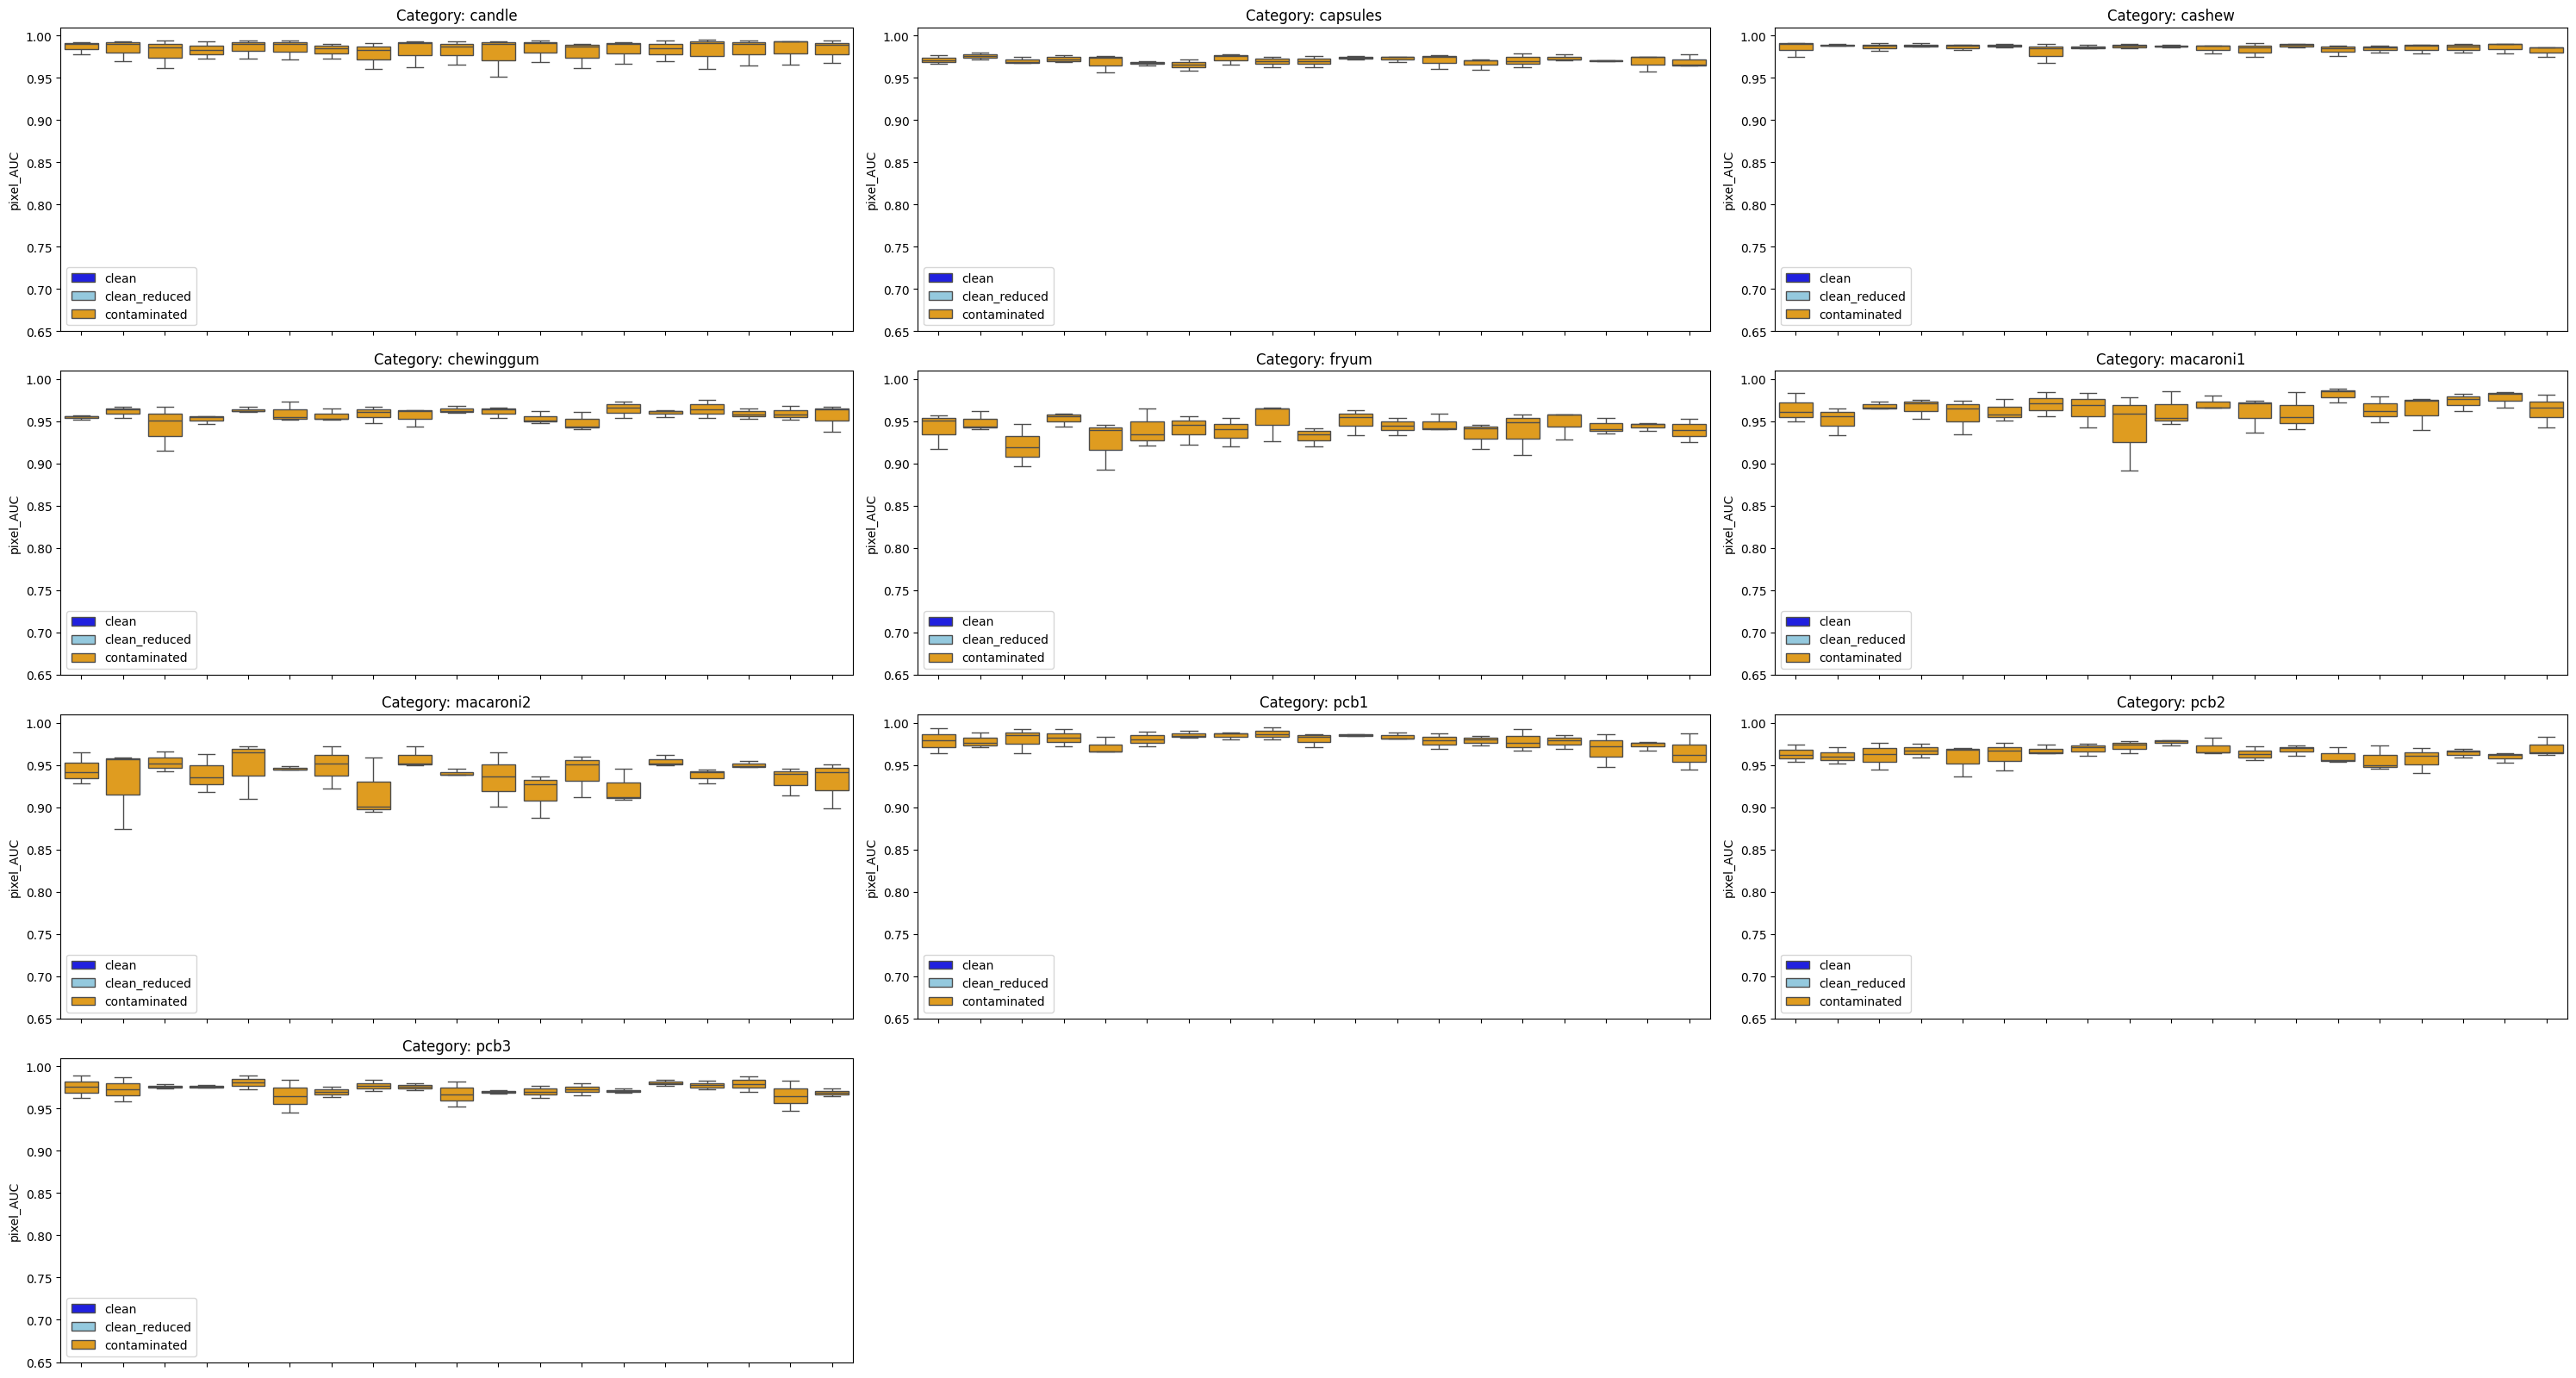

In [ ]:
allres_epochs = allres[allres['epoch'] > 130]
categories =allres['category'].unique()
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()
hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}


for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="pixel_AUC", hue="setting", data=allres_cat, ax=ax,hue_order=hue_order,palette=palette)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65,1.01)
for ax in axes[len(categories):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

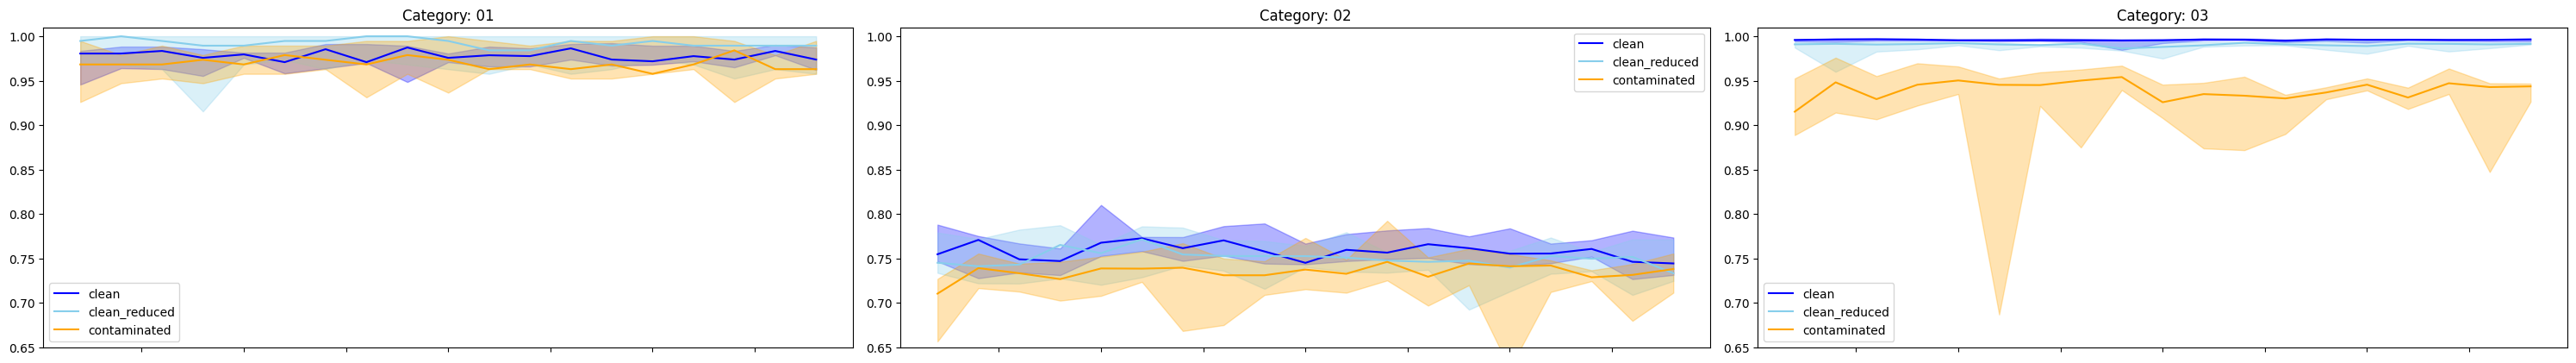

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65, 1.01)

for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

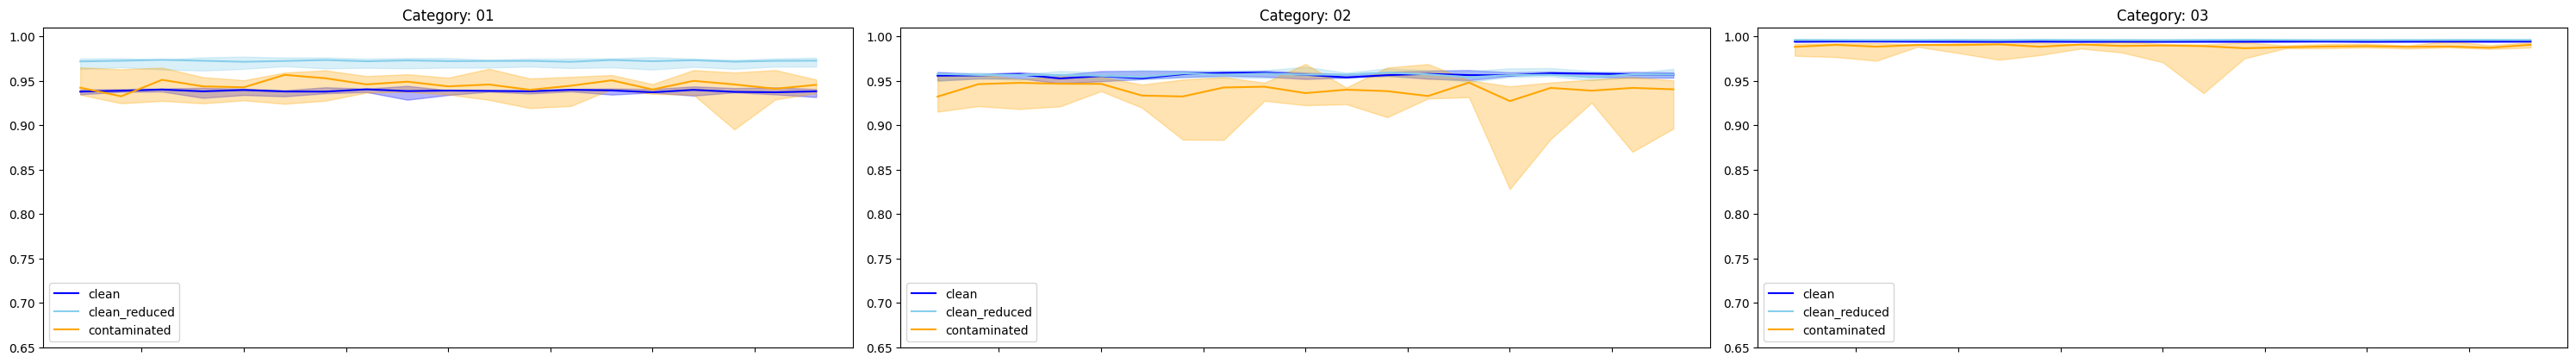

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['pixel_AUC'].max()
    lowest = data.groupby('epoch')['pixel_AUC'].min()
    median = data.groupby('epoch')['pixel_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65, 1.01)

for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# fewer data

['candle', 'capsules', 'cashew', 'chewinggum', 'fryum', 'macaroni1', 'macaroni2', 'pcb1', 'pcb2', 'pcb3', 'pcb4', 'pipe_fryum']
['candle', 'capsules', 'cashew', 'chewinggum', 'fryum', 'macaroni1', 'macaroni2', 'pcb1', 'pcb2', 'pcb3', 'pcb4', 'pipe_fryum']
candle
capsules
cashew
chewinggum
fryum
macaroni1
macaroni2
pcb1
pcb2
pcb3
pcb4
pipe_fryum
       Loss  Loss_scale  image_AUC  pixel_AUC    category contamination  \
0  0.002058    0.004382   0.971200   0.967875      candle             0   
1  0.002037    0.004316   0.968400   0.974174      candle             0   
2  0.002053    0.004369   0.970000   0.971981      candle             0   
3  0.002050    0.004325   0.971700   0.972122      candle             0   
4  0.002043    0.004327   0.974100   0.971074      candle             0   
0  0.005143    0.009547   0.896833   0.982934    capsules             0   
1  0.005077    0.009450   0.871000   0.982507    capsules             0   
2  0.005101    0.009476   0.889667   0.983223    caps

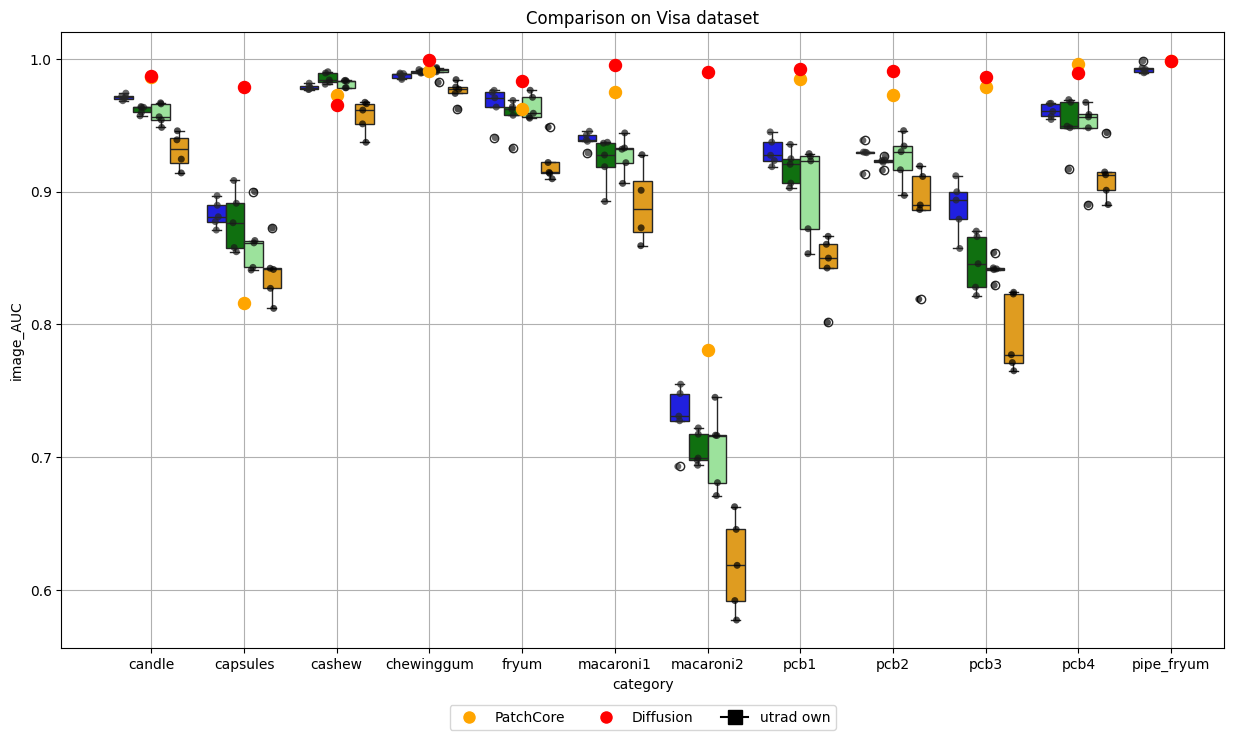

In [5]:
exp_name= "Exp_20_06_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df_full=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

        if os.path.exists(logfile_path):
            if len(read_training_scores( logfile_path)['Loss'])<150:
                continue
            else:
                logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_full.append(lastrow_df)
    
res_df_full= pd.concat(res_df_full)
res_df_full['contamination']= ['0']*len(res_df_full)
res_df_full['setting']= ['clean_full']*len(res_df_full)

print(res_df_full)



exp_name= "Exp_11_07_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

        if os.path.exists(logfile_path):
            if len(read_training_scores( logfile_path)['Loss'])<150:
                continue
            else:
                logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)

print(res_df)

exp_name= "Exp_11_07_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_10/'

run_range= np.arange(1,6)
res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)
res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['contaminated']*len(res_df_cont)

print(res_df_cont)


exp_name= "Exp_11_07_24"
root= '/home/bule/projects/UTRAD/results/visa/contamination_10/'

run_range= np.arange(1,6)
res_df_cont_c=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont_c.append(lastrow_df)
    
res_df_cont_c= pd.concat(res_df_cont_c)
res_df_cont_c['contamination']= ['10']*len(res_df_cont_c)
res_df_cont_c['setting']= ['clean_reduced']*len(res_df_cont_c)





res_df_end=pd.concat([res_df_full,res_df, res_df_cont,res_df_cont_c])


print(res_df_end.head())




hue_order = ['clean_full','clean', 'clean_reduced', 'contaminated']
palette = {
    'clean_full': 'blue',   
    'clean': 'green',
    'clean_reduced': 'lightgreen',
    'contaminated': 'orange'
}

#https://paperswithcode.com/paper/diffusionad-denoising-diffusion-for-anomaly

# Data from the provided table
data = {
    "candle":     [0.986, 0.987],
    "capsules":   [0.816, 0.979],
    "cashew":     [0.973, 0.965],
    "chewinggum": [0.991, 0.999],
    "fryum":      [0.962, 0.983],
    "macaroni1":  [0.975, 0.995],
    "macaroni2":  [0.781, 0.990],
    "pcb1":       [0.985, 0.992],
    "pcb2":       [0.973, 0.991],
    "pcb3":       [0.979, 0.986],
    "pcb4":       [0.996, 0.989],
    "pipe_fryum": [0.998, 0.998],
}

# Creating dictionaries for PatchCore and Ours
auc_patchcore = {key: value[0] for key, value in data.items()}
auc_diffusion = {key: value[1] for key, value in data.items()}



# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_patchcore.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)

for category, auc in auc_diffusion.items():
    ax.scatter(x=[category], y=auc, color='red', s=75, zorder=5)
    
    
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='PatchCore', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Diffusion', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='black', label='utrad own', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Visa dataset')
plt.grid(True)
plt.show()

# REmove redundatn results


In [ ]:
#clean
dirs=['/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-candle','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-cashew','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-fryum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_1-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-candle','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-cashew','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-fryum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_2-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-candle','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-cashew','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-fryum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_3-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-candle','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-cashew','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-fryum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_4-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-candle','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-cashew','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-fryum','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_0/Exp_20_06_24_run_5-pcb3'
]

# dirs=['/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-candle','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-capsules','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-cashew','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-fryum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_1-pipepfryum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-candle','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-capsules','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-cashew','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-fryum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-pcb3','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_2-pipepfryum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-candle','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-capsules','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-cashew','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-chewinggum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-fryum','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-macaroni1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-macaroni2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-pcb1','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-pcb2','/home/bule/projects/UTRAD/results/visa/contamination_10/Exp_01_07_24_run_3-pcb3'
# ]

notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args.log')['Loss'])<150:
        notlonglist.append(path)
        
        
notlonglist

[]

In [ ]:
import shutil
import os

# List of directories to remove
directories = [

]

# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(directories)